<a href="https://colab.research.google.com/github/AhmadDzakiPutraDimas/Prediksi-Indeks-Harga-Konsumen-Menggunakan-RNN-Recurrent-Neural-Network-/blob/main/IHK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import gspread
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive_id = '4/1AX4XfWgOM1GOCygd1pFEdR1_TioP63dK_xjFcX9rALYIpYqgbtiyKQinuu4'
files = drive.CreateFile({'id': drive_id})
 
gc = gspread.authorize(gauth.credentials)
url = 'https://docs.google.com/spreadsheets/d/130RhUSYLwk5DXnBI0CvCcgYrgbKXxSoxgF6nIHyqVnE/edit?usp=sharing'
worksheet = gc.open_by_url(url).sheet1
rows = worksheet.get_all_records()

In [ ]:
tabel = pd.DataFrame.from_records(rows)
tabel

,Bulan,IHK
0,January 2016,95.14
1,February 2016,95.54
2,March 2016,95.67
3,April 2016,94.90
4,May 2016,94.88
...,...,...
62,March 2021,106.83
63,April 2021,106.68
64,May 2021,107.36
65,June 2021,107.43


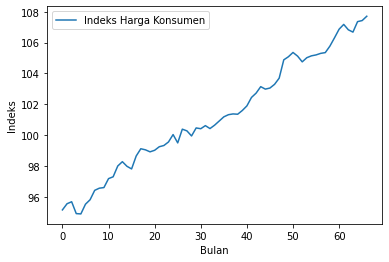

In [ ]:
data = tabel.loc[:,'IHK']
dataset = data.values
IndeksHK = dataset.astype('float32')
IndeksHK = np.array(IndeksHK.reshape(-1,1))

plt.plot(IndeksHK, label='Indeks Harga Konsumen')
plt.xlabel('Bulan')
plt.ylabel('Indeks')
plt.legend()
plt.show()

In [ ]:
 def HK (rand,lookback): 
  x, y = matriks(rand, look_back) 
  x = np.reshape(x, (x.shape[0], 1, x.shape[1])) 
  xTrain,yTrain,xTest,yTest= x[0:52,:],y[0:52,:], x[52:,:],y[52:,:]
 
  return xTrain, yTrain ,xTest, yTest

In [ ]:
xTrain,yTrain,xTest,yTest

In [ ]:
def scale_invers (ihh,model):
  scaler =MinMaxScaler(feature_range=(0,1))
  rand=scaler.fit_transform(ihh)
  r = scaler.inverse_transform(model)
  return rand,r


In [ ]:
def matriks(data_arr, look_back):
  X, Y = [], []
  for i in range(len(data_arr)-look_back):
    d=i+look_back
    X.append(data_arr[i:d])
    Y.append(data_arr[d])

  X = np.array(X)
  Y = np.array(Y)

  return X, Y

def model_loss(history,case):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.title('model_loss'+str(case))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show;

In [ ]:
  look_back = 5

  model=Sequential()
  model.add(SimpleRNN(units=30, input_dim=look_back, activation='relu')) #Input Layer
  model.add(Dense(70, activation='relu')) #Hidden layer 1
  model.add(Dense(40, activation='relu')) #Hidden layer 2
  model.add(Dense(1)) #output
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

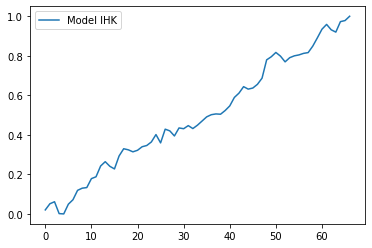

In [ ]:
randIHK,rIHK=scale_invers(IndeksHK,IndeksHK)

plt.plot(randIHK, label='Model IHK')
plt.legend()
plt.show()

In [ ]:
t = np.arange(len(randIHK))

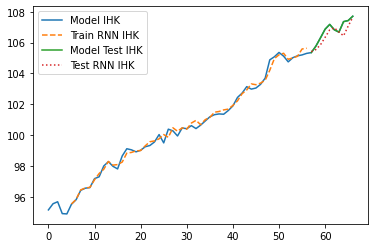

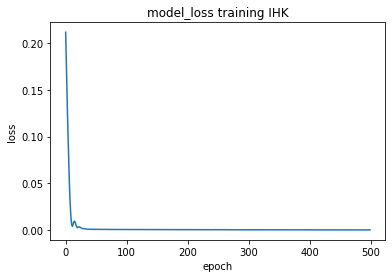

In [ ]:
xTrain, yTrain, xTest, yTest = HK(randIHK,look_back)
history1 = model.fit(xTrain, yTrain, epochs=500,verbose = 0)
trainPrediksiIHK = model.predict(xTrain)
testPrediksiIHK = model.predict(xTest)

rand, trainPrediksiIHK = scale_invers(IndeksHK, trainPrediksiIHK)
rand, yTrain = scale_invers(IndeksHK, yTrain)
rand, testPrediksiIHK = scale_invers(IndeksHK,testPrediksiIHK)
rand, yTest = scale_invers(IndeksHK, yTest)

rr, rrr = scale_invers(IndeksHK, randIHK)
plt.plot(rrr, label='Model IHK')
plt.plot(t[look_back:52+look_back],trainPrediksiIHK,'--',label='Train RNN IHK')
plt.plot(t[52+look_back:], yTest,label='Model Test IHK')
plt.plot(t[52+look_back:],testPrediksiIHK,':',label='Test RNN IHK')
plt.legend(loc='upper left')
plt.show()
model_loss(history1,' training IHK')

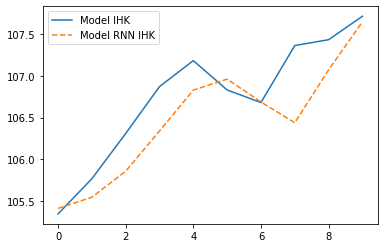

In [ ]:
plt.plot(yTest, label='Model IHK')
plt.plot(testPrediksiIHK, '--', label='Model RNN IHK')
plt.legend(loc='upper left')
plt.show()

In [ ]:
trainScore = np.sqrt(np.mean(yTrain[:,0] - trainPrediksiIHK[:,0])**2)
print('Train Score IHK: %.6f RMSE'%(trainScore))
testScore = np.sqrt(np.mean(yTest[:,0] - testPrediksiIHK[:,0])**2)
print('Test Score IHK: %.6f RMSE'%(testScore))


Train Score IHK: 0.034293 RMSE
Test Score IHK: 0.269951 RMSE


In [ ]:
new_tabel = tabel.loc[:,'IHK']
new_tabel = new_tabel.values
new_tabel = new_tabel.reshape(-1,1)

In [ ]:
mmscaler = MinMaxScaler(feature_range=(0,1))
last_day_scaled = mmscaler.fit_transform(new_tabel[-5:])

X_test = []
X_test.append(last_day_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[0],5))

pred_IHK = model.predict(X_test)
pred_IHK_unscaled = mmscaler.inverse_transform(pred_IHK)

lastest_IHK = round(new_tabel.ravel()[66], 2)
predicted_IHK = round(pred_IHK_unscaled.ravel()[0], 2)

print(f'Angka IHK terbaru: {lastest_IHK}')
print(f'Prediksi Angka IHK bulan Depan: {predicted_IHK}')

Angka IHK terbaru: 107.71
Prediksi Angka IHK bulan Depan: 107.36000061035156


In [ ]:
matriks = np.eye(3)
matriks